# TXPipe - Reduced Shear

This notebook illustrates the new option to compute **reduced shear** directly within TXPipe using CLMM.  
Instead of producing excess surface density (ΔΣ), the pipeline here outputs background galaxy shapes in terms of reduced shear, providing an alternative lensing observable for cluster analyses.  

We will walk through:  
- Running the TXPipe stages needed to build per-cluster reduced shear catalogs  
- Inspecting the structure of the outputs  
- Demonstrating how these catalogs can be used as CLMM inputs


In [1]:
import clmm
print(clmm.__version__)
import pyccl as ccl
print(ccl.__version__)

1.14.1
3.2.1


In [2]:
import os
from pprint import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ceci

/sps/lsst/users/ebarroso/conda_envs/txpipe_clp/lib/python3.10/site-packages/ceci/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


# 1 deg$^2$ Sample

We will do some runs on the 1 deg^2 example data set with around 80k galaxies. This is small enough that we can do it all in jupyter.

The data set, which is based on CosmoDC2, contains pre-computed photo-z and and contains a RedMapper cluster catalog for the field.

We will clone our own copy of the TXPipe directory, and run this notebook from there.  **Please change `my_txpipe_dir`** to your own version of the path when running this:

In [5]:
my_txpipe_dir = "/sps/lsst/users/ebarroso/TXPipe"
import sys
sys.path.append("/sps/lsst/users/ebarroso/TXPipe")
import importlib
import txpipe


Now we make an output directory for everything, if it doesn't exist already.

In [6]:
os.makedirs(f"{my_txpipe_dir}/data/example/outputs_metadetect", exist_ok=True)
os.makedirs(f"{my_txpipe_dir}/data/example/outputs_shear_catalogs", exist_ok=True)

In [7]:
if not os.path.exists(f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5"):
    raise RuntimeError("Download and extract the sample data file to continue")

---

## WL sample selection

Our first step is the WL sample selection. This does both selection and tomography. The latter is not used here.

In [8]:
step1 = txpipe.TXSourceSelectorMetadetect.make_stage(
    # This file is the input metadetect shear catalog
    shear_catalog=f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5",
    # This is an input training set for the tomographic selection
    calibration_table=f"{my_txpipe_dir}/data/example/inputs/sample_cosmodc2_w10year_errors.dat",

    # This contains all the options for this stage. You can override them here
    # manually too.
    config=f"{my_txpipe_dir}/examples/metadetect/config.yml",

    # This is the output file for this stage
    shear_tomography_catalog=f"{my_txpipe_dir}/data/example/outputs_metadetect/shear_tomography_catalog.hdf5"
)

This step will first train a classifier to select objects into tomographic bins, and then run it on the input data files
to produce the output file:

In [9]:
step1.run()
step1.finalize()

Process 0 running selection for rows 0-82,200


## Inspecting the output of the first stages

In [11]:
import h5py
with h5py.File(f"{my_txpipe_dir}/data/example/outputs_metadetect/shear_tomography_catalog.hdf5", "r") as f:
    # Print all root level object names (aka keys)
    print("Keys: %s" % f.keys())
    # Access the 'tomography' group and then the 'bin' dataset
    bin_data = f['tomography']['bin'][()]
    print([bin_data[i] for i in range(len(bin_data)) if bin_data[i]!= -1 ])
    # Count how many entries are not -1
    count = len(bin_data[bin_data != -1])
    print(count)


Keys: <KeysViewHDF5 ['provenance', 'response', 'tomography']>
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
import h5py
with h5py.File(f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5", "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    print(f['shear']['00'].keys())

Keys: <KeysViewHDF5 ['shear']>
<KeysViewHDF5 ['T', 'T_err', 'dec', 'flags', 'g1', 'g2', 'id', 'mag_err_i', 'mag_err_r', 'mag_err_z', 'mag_i', 'mag_r', 'mag_z', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'psf_g1', 'psf_g2', 'ra', 'redshift_true', 's2n', 'true_g1', 'true_g2', 'weight']>


---

## Cluster shear catalog indexing and weights

Our second step runs the matching to find the shear catalog behind every cluster. Here we are already demonstrating that we can use several options, as for insteanse the reduced shear instead of delta sigma.

This step saves a cluster shear catalog, which is actually just an index into the shear and cluster catalogs (to avoid making many copies of the data), with added weights from CLMM

In [13]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterShearCatalogs.config_options)
def run_different_options(delta_sigma, weight_criterion, cut_criterion, name, shape=False):
    step2 = txpipe.extensions.CLClusterShearCatalogs.make_stage(
        # Shear catalog, as before
        shear_catalog=f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5",
        # This is the initial cluster catalog - RAs, Decs, richess, redshift, etc.
        cluster_catalog=f"{my_txpipe_dir}/data/example/inputs/cluster_catalog.hdf5",
        # This fiducial cosmology is used to convert distance separations to redshifts
        fiducial_cosmology=f"{my_txpipe_dir}/data/fiducial_cosmology.yml",
        # The tomography catalog created in step 1 selects objects for the WL sample
        # and assigns them to tomographic bins. We don't need the tomography here, just the basic selection
        shear_tomography_catalog=f"{my_txpipe_dir}/data/example/outputs_metadetect/shear_tomography_catalog.hdf5",
        # This is a QP file created by RAIL to generate the photo-zs for this sample
        source_photoz_pdfs=f"{my_txpipe_dir}/data/example/inputs/photoz_pdfs.hdf5",
        # This is the output for this stage
        cluster_shear_catalogs=f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_{name}.hdf5",
        output_dir=f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/",
        #redshift_cut_criterion = 'nz',
        # Let's override one of the configuration parameters for this stage:
        max_radius=10.0,
        delta_sigma = delta_sigma,
        redshift_weight_criterion = weight_criterion,
        redshift_cut_criterion = cut_criterion,
        use_shape_noise = shape,
    )
    step2.run()
    step2.finalize()
    final_name = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_{name}.hdf5",
    return final_name
    

Options for this pipeline and their defaults:
{'chunk_rows': 100000, 'max_radius': 10.0, 'delta_z': 0.1, 'redshift_cut_criterion': 'zmode', 'redshift_weight_criterion': 'zmode', 'redshift_cut_criterion_pdf_fraction': 0.9, 'subtract_mean_shear': False, 'coordinate_system': 'celestial', 'use_true_shear': False, 'delta_sigma': False, 'use_shape_noise': False}


In [14]:
mean_ds = run_different_options(True, 'zmean', 'zmean', 'mean_ds')
mode_ds = run_different_options(True, 'zmode', 'zmode', 'mode_ds')
pdf_ds = run_different_options(True, 'pdf', 'pdf', 'pdf_ds')
pdf_ds_shape = run_different_options(True, 'pdf', 'pdf', 'pdf_ds_shape', True)
mean_gamma = run_different_options(False, 'zmean', 'zmean', 'mean_gamma')
mode_gamma = run_different_options(False, 'zmode', 'zmode', 'mode_gamma')
pdf_gamma = run_different_options(False, 'pdf', 'pdf', 'pdf_gamma')

run_options = ['mean_ds', 'mode_ds', 'pdf_ds', 'pdf_ds_shape', 'mean_gamma', 'mode_gamma', 'pdf_gamma']
all_runs_names = [mean_ds, mode_ds, pdf_ds,pdf_ds_shape, mean_gamma, mode_gamma, pdf_gamma]

Min search angle =  20.111239360034133 arcmin
Mean search angle =  25.964606752423457 arcmin
Max search angle =  45.0930880390025 arcmin
Max theta_max = 0.013117047602871116 radians = 45.0930880390025 arcmin
Using single 2D shear calibration!
Process 0 processing chunk 0 - 82,200
Process 0 done reading
Overall pair count =  221371
Found 3035 total galaxies in catalog for cluster 11
Found 2765 total galaxies in catalog for cluster 827
Found 2730 total galaxies in catalog for cluster 1985
Found 2652 total galaxies in catalog for cluster 1632
Found 1137 total galaxies in catalog for cluster 2453
Found 4221 total galaxies in catalog for cluster 2678
Found 1446 total galaxies in catalog for cluster 4643
Found 677 total galaxies in catalog for cluster 5084
Found 2384 total galaxies in catalog for cluster 4434
Found 2343 total galaxies in catalog for cluster 3939
Found 4589 total galaxies in catalog for cluster 6139
Found 1880 total galaxies in catalog for cluster 4709
Found 4123 total galaxi

## Exploring the index

To avoid making lots and lots of copies of the data, this stage has not made a catalog, but instead made an index into the other catalogs, and stored only the relevant weight.

We have a helper class which is designed to match up all the different catalogs that go into this and collect the results for each cluster.

In [15]:
def run_combined_cluster_per_name(name):
    ccc = txpipe.extensions.CombinedClusterCatalog(
        shear_catalog=f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5",
        shear_tomography_catalog=f"{my_txpipe_dir}/data/example/outputs_metadetect/shear_tomography_catalog.hdf5",
        cluster_catalog=f"{my_txpipe_dir}/data/example/inputs/cluster_catalog.hdf5",
        cluster_shear_catalogs=name,
        source_photoz_pdfs=f"{my_txpipe_dir}/data/example/inputs/photoz_pdfs.hdf5",
    )
    print(name)
    return ccc

In [16]:
combined_list = [run_combined_cluster_per_name(name[0]) for name in all_runs_names]
print(combined_list)

/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_mean_ds.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_mode_ds.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_pdf_ds.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_pdf_ds_shape.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_mean_gamma.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_mode_gamma.hdf5
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_pdf_gamma.hdf5
[<txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7fc26993bfa0>, <txpipe.extensions.cluster_counts.sources_select_compute.CombinedClusterCatalog object at 0x7fc26993a590>, <txpipe.extensions.cluster_coun

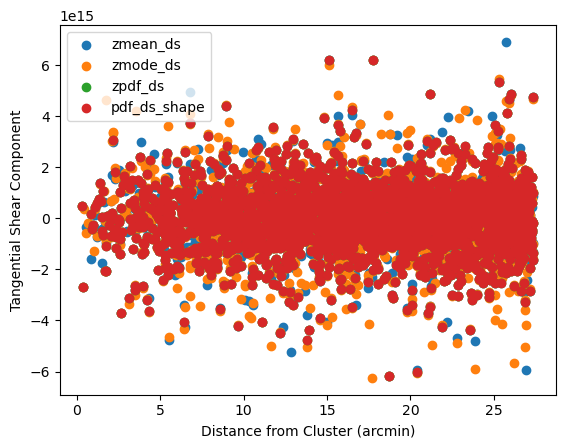

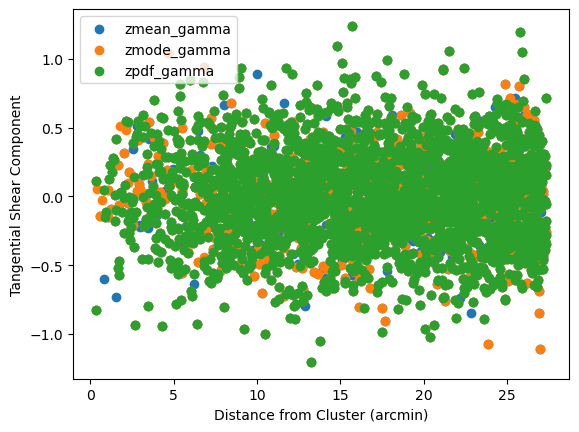

In [17]:
bg_cat_list = [ccc.get_background_shear_catalog(0) for ccc in combined_list]
all_runs_names = [mean_ds, mode_ds, pdf_ds, pdf_ds_shape, mean_gamma, mode_gamma, pdf_gamma]
labels = ['zmean_ds', 'zmode_ds', 'zpdf_ds', 'pdf_ds_shape','zmean_gamma', 'zmode_gamma', 'zpdf_gamma']
for i,bg_cat in enumerate(bg_cat_list):
    plt.scatter(bg_cat['distance_arcmin'] ,bg_cat['tangential_comp'], label = labels[i])
    plt.ylabel('Tangential Shear Component')
    plt.xlabel('Distance from Cluster (arcmin)')
    plt.legend()
    if i == 3:
        plt.show()
plt.show()

A also the shear catalog associated with that cluster, again by index, in the CLMM data format:

## Binning Cluster Catalog

In [18]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterBinningRedshiftRichness.config_options)
step3 = txpipe.extensions.CLClusterBinningRedshiftRichness.make_stage(
cluster_catalog=f"{my_txpipe_dir}/data/example/inputs/cluster_catalog.hdf5",
richedge = [0, 80],
cluster_catalog_tomography=f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_catalog_tomography.hdf5",
)
step3.run()
step3.finalize()
    

Options for this pipeline and their defaults:
{'zedge': [0.2, 0.4, 0.6, 0.8, 1.0], 'richedge': [5.0, 10.0, 20.0], 'initial_size': 100000, 'chunk_rows': 100000}


## Making the Ensemble Profile

We have also propagated the information about which profile we are computing, delta sigma or reduced shear in this stage. we see `('profile_type', 'reduced_shear')` in the metadata.

In [30]:
radius_bins = 4
def run_different_options_ensemble(delta_sigma, name, name2):
    print(name)
    step4 = txpipe.extensions.CLClusterEnsembleProfiles.make_stage(
        shear_catalog=f"{my_txpipe_dir}/data/example/inputs/metadetect_shear_catalog.hdf5",
        fiducial_cosmology=f"{my_txpipe_dir}/data/fiducial_cosmology.yml",
        cluster_shear_catalogs=name,
        cluster_catalog_tomography = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_catalog_tomography.hdf5",
        r_max = 5.0,
        output_dir=f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/",
        #config="examples/metadetect/config.yml",  
        #max_radius=10.0,
        cluster_profiles = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_profiles_{name2}.pkl",
        units='arcmin',
        angle_arcmin_min=5,
        angle_arcmin_max=30,
        nbins=radius_bins,
    )
    step4.run()
    step4.finalize()
    final_name = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_profiles_{name2}.pkl"
    return final_name
    

In [31]:
test_ensemble = [run_different_options_ensemble(None, run[0], i) for i,run in enumerate(all_runs_names)]

/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/my_cluster_shear_catalog_mean_ds.hdf5
Ncluster 8
For cluster 6139.0 at z= 0.33334264159202576 with n_source =  4589 theta_max is 35.03023710694247  arcmin = 9.998842434359426 Mpc
GCMetaData([('coordinate_system', 'celestial'), ('profile_type', 'delta_sigma'), ('cosmo', None)])
For cluster 10999.0 at z= 0.3490130603313446 with n_source =  6639 theta_max is 33.979436474340474  arcmin = 9.999808317244387 Mpc
GCMetaData([('coordinate_system', 'celestial'), ('profile_type', 'delta_sigma'), ('cosmo', None)])
For cluster 8523.0 at z= 0.3723301589488983 with n_source =  6842 theta_max is 32.58250761415833  arcmin = 9.999955820642535 Mpc
GCMetaData([('coordinate_system', 'celestial'), ('profile_type', 'delta_sigma'), ('cosmo', None)])
For cluster 17462.0 at z= 0.2546227276325226 with n_source =  6868 theta_max is 42.37073978575504  arcmin = 9.998979828146442 Mpc
GCMetaData([('coordinate_system', 'celestial'), ('profile_type', '

## SACC File
Lastly we are running the SACC stage to show the profiles. THis stage has to be addapted for the reduced shear as we can measure it in angles instead of physical radii. Also, we need to decide on the type of data that we will assign to the different options.

In [32]:
print("Options for this pipeline and their defaults:")
print(txpipe.extensions.CLClusterSACC.config_options)
def run_different_options_sacc(delta_sigma, name, name2):
    print(name)
    step5 = txpipe.extensions.CLClusterSACC.make_stage(
        cluster_profiles = name,
        survey_name = 'cosmodc2-1deg',
        area = 1.0,
        cluster_sacc_catalog = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_sacc_catalog_{name2}.sacc"
    )
    step5.run()
    step5.finalize()
    final_name = f"{my_txpipe_dir}/data/example/outputs_shear_catalogs/cluster_sacc_catalog_{name2}.sacc"
    return final_name
    

Options for this pipeline and their defaults:
{'r_min': 0.5, 'r_max': 5.0}


In [33]:
test_sacc = [run_different_options_sacc(None, run, i) for i,run in enumerate(test_ensemble)]

/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_profiles_0.pkl
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_profiles_0.pkl
{'bin_zbin_0_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.4, 'z_min': 0.2}, 'n_cl': 8, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268531270>}, 'bin_zbin_1_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.6, 'z_min': 0.4}, 'n_cl': 28, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268531ea0>}, 'bin_zbin_2_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.8, 'z_min': 0.6}, 'n_cl': 21, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268530370>}, 'bin_zbin_3_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 1.0, 'z_min': 0.8}, 'n_cl': 11, 'clmm_cluster_ensemble': <clmm.clusterensemble.Cluste

/sps/lsst/users/ebarroso/TXPipe/txpipe/extensions/cluster_counts/convert_to_sacc.py:88: RuntimeWarning: divide by zero encountered in log10
  sacc_obj.add_tracer("bin_richness", bin_rich, np.log10(rich_bins[bin_rich][0]), np.log10(rich_bins[bin_rich][1]))
NOTE/WARNING: Expected output file /sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_sacc_catalog_0.sacc was not generated.
/sps/lsst/users/ebarroso/TXPipe/txpipe/extensions/cluster_counts/convert_to_sacc.py:88: RuntimeWarning: divide by zero encountered in log10
  sacc_obj.add_tracer("bin_richness", bin_rich, np.log10(rich_bins[bin_rich][0]), np.log10(rich_bins[bin_rich][1]))
NOTE/WARNING: Expected output file /sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_sacc_catalog_1.sacc was not generated.
/sps/lsst/users/ebarroso/TXPipe/txpipe/extensions/cluster_counts/convert_to_sacc.py:88: RuntimeWarning: divide by zero encountered in log10
  sacc_obj.add_tracer("bin_richness", bin_rich, 

/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_profiles_5.pkl
/sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_profiles_5.pkl
{'bin_zbin_0_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.4, 'z_min': 0.2}, 'n_cl': 8, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268533be0>}, 'bin_zbin_1_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.6, 'z_min': 0.4}, 'n_cl': 28, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268531ae0>}, 'bin_zbin_2_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 0.8, 'z_min': 0.6}, 'n_cl': 21, 'clmm_cluster_ensemble': <clmm.clusterensemble.ClusterEnsemble object at 0x7fc268530760>}, 'bin_zbin_3_richbin_0': {'cluster_bin_edges': {'rich_max': 80.0, 'rich_min': 0.0, 'z_max': 1.0, 'z_min': 0.8}, 'n_cl': 11, 'clmm_cluster_ensemble': <clmm.clusterensemble.Cluste

NOTE/WARNING: Expected output file /sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_sacc_catalog_4.sacc was not generated.
/sps/lsst/users/ebarroso/TXPipe/txpipe/extensions/cluster_counts/convert_to_sacc.py:88: RuntimeWarning: divide by zero encountered in log10
  sacc_obj.add_tracer("bin_richness", bin_rich, np.log10(rich_bins[bin_rich][0]), np.log10(rich_bins[bin_rich][1]))
NOTE/WARNING: Expected output file /sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_sacc_catalog_5.sacc was not generated.
/sps/lsst/users/ebarroso/TXPipe/txpipe/extensions/cluster_counts/convert_to_sacc.py:88: RuntimeWarning: divide by zero encountered in log10
  sacc_obj.add_tracer("bin_richness", bin_rich, np.log10(rich_bins[bin_rich][0]), np.log10(rich_bins[bin_rich][1]))
NOTE/WARNING: Expected output file /sps/lsst/users/ebarroso/TXPipe/data/example/outputs_shear_catalogs/cluster_sacc_catalog_6.sacc was not generated.


### Here we plot the profile of one bin for each file

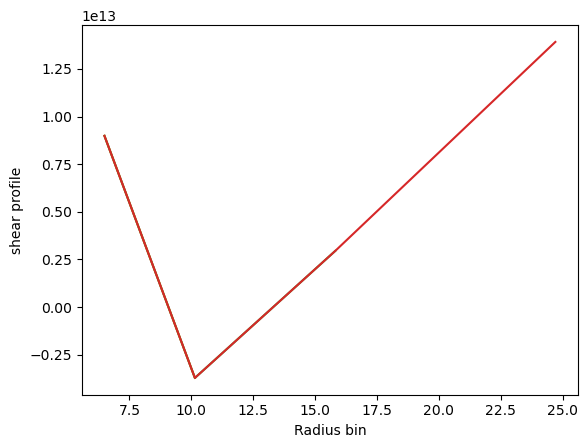

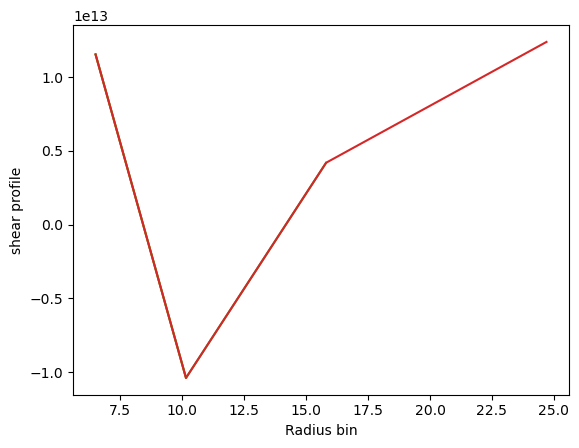

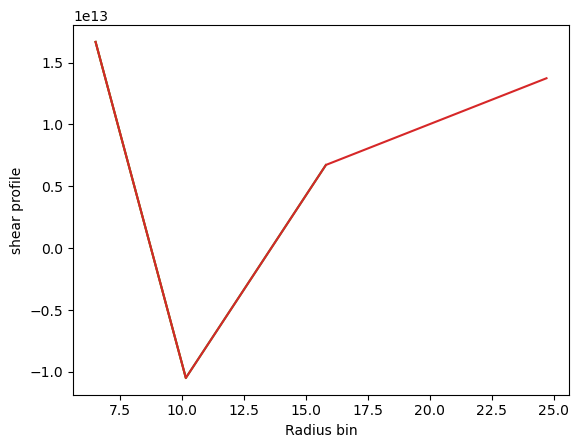

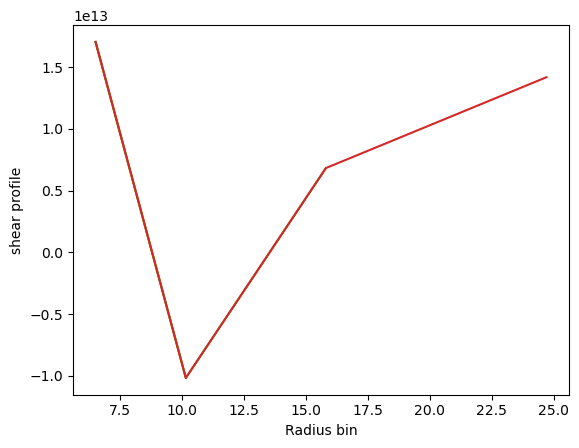

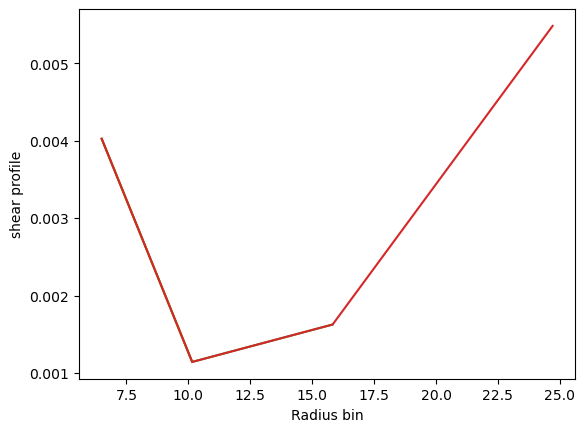

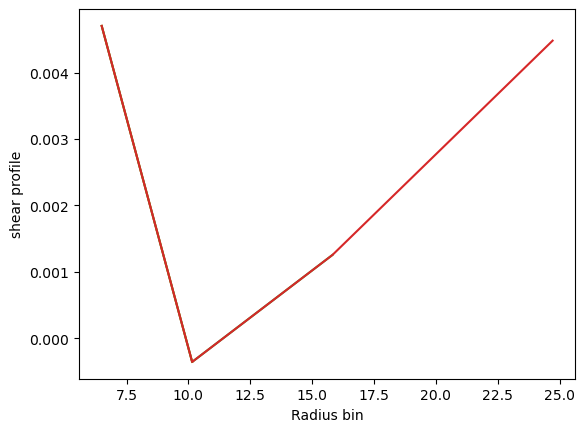

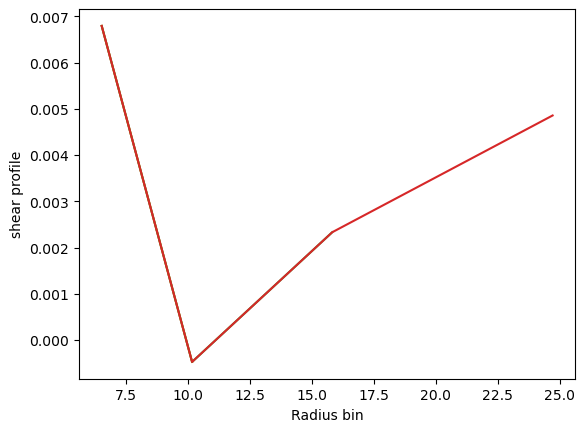

In [36]:
import sacc
for name in test_sacc:
    t = sacc.Sacc.load_fits(name)
    data2 = []
    radius2 = []
    for i in range(0,radius_bins):
        trac = ('cosmodc2-1deg', 'bin_rich_0', 'bin_z_2', f'radius_{i}')
        data2.append(t.get_data_points(sacc.data_types.standard_types.cluster_shear, trac)[0].value)
        radius = t.tracers[f'radius_{i}'].center
        radius2.append(radius)
        plt.plot(radius2, data2, label='Calibrated Shear')
        plt.ylabel("shear profile")
        plt.xlabel("Radius bin")
    plt.show()